In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import seaborn as sns
from sklearn_som.som import SOM
from collections import Counter
from cellType import CellType
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('full_data.csv', engine= 'python')

for c in df.columns[1:]:
    if c == 'TissueTypePrediction':
        break
    if not is_numeric_dtype(df[c]):
        df[c] = df[c].apply(lambda x: float(x.split()[0].replace(',','.')))

In [2]:
PATIENT_NUM = 1
Som_M = 4
Som_N = 4

df[df['Patient'] == PATIENT_NUM]["Status.simple"].value_counts()

Uninflamed    37471
Dysplastic    23321
Inflamed      14016
Name: Status.simple, dtype: int64

In [3]:
# df = df[df['Patient'] == PATIENT_NUM]
dfn = df._get_numeric_data()
normalized_np = StandardScaler().fit_transform(dfn)
normalized_df = pd.DataFrame(normalized_np, columns=dfn.columns)

typelist = df[df['Patient'] == PATIENT_NUM]['Status.simple'].unique()
maskP = df['Patient'] == PATIENT_NUM
mask = df['Status.simple'] == "Uninflamed"
df1 = normalized_df.copy()

df1 = normalized_df

col = ["ROInr","Cell_Area","Nucl_Area","X80ArAr_Mean","sSMA113_Mean","aSMA_Mean","X124Xe_Mean","X127I_Mean","X129Xe_Mean","X132Xe_Mean","RORgt_Mean","Ecad_Mean","CD20_Mean","GATA3_Mean","GATA3_Nucl_Mean","Tbet_Mean","Tbet_Nucl_Mean","CD16_Mean","BetaCatenin_Mean","PanKeratin_Mean","CTLA4_Mean","PDL1_Mean","IFNg_Mean","CD45RO_Mean","AKT_Mean","HLA_DR-DP-DQ_Mean","FOXP3_Mean","FOXP3_Nucl_Mean","CD4_Mean","CD103_Mean","pSTAT3_Mean","CD68_Mean","IL10_Mean","CD45_Mean","CD8a_Mean","ICOS_Mean","pS6_Mean","PD1_Mean","NFkB_Mean","NFkB_Nucl_Mean","IL17a_Mean","Ki67_Mean","Ki67_Nucl_Mean","GranzymeB_Mean","CD3_Mean","pERK_Mean","Cleaved Caspase 3_Mean","ERK_Mean","TCRgd_Mean","pAKT_Mean","H3_Mean","H3_Nucl_Mean","Ir193_Mean","Ir193_Nucl_Mean"]
df2 = df1[col]
som = SOM(m=Som_M, n=Som_N, dim=54)
som.fit(np.array(df2),epochs=10000)

<AxesSubplot:>

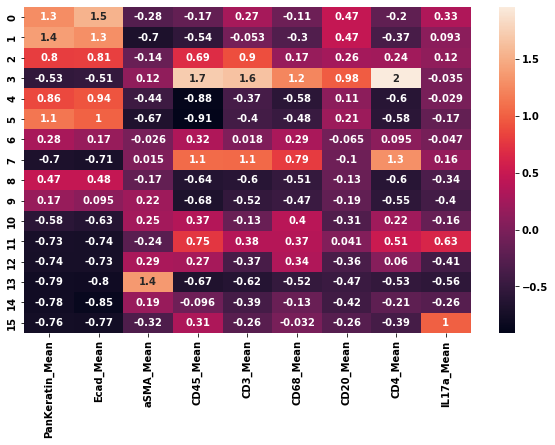

In [4]:
celltypes = CellType(som, df2.copy(), col)
celltypes.proportion()
celltypes.fixeClusterLabel()
sns.heatmap(celltypes.plotMe, annot=True)

<AxesSubplot:>

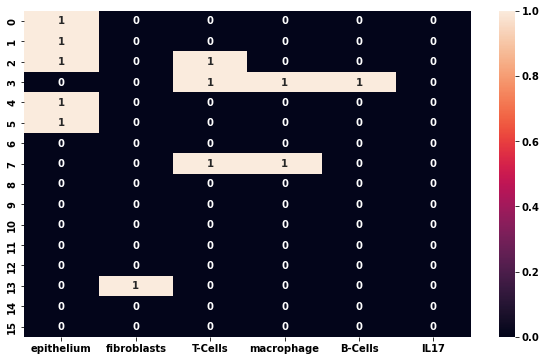

In [5]:
sns.heatmap(celltypes.plotlabel, annot=True)

In [6]:
col = ["ROInr","Cell_Area","Nucl_Area","X80ArAr_Mean","sSMA113_Mean","aSMA_Mean","X124Xe_Mean","X127I_Mean","X129Xe_Mean","X132Xe_Mean","RORgt_Mean","Ecad_Mean","CD20_Mean","GATA3_Mean","GATA3_Nucl_Mean","Tbet_Mean","Tbet_Nucl_Mean","CD16_Mean","BetaCatenin_Mean","PanKeratin_Mean","CTLA4_Mean","PDL1_Mean","IFNg_Mean","CD45RO_Mean","AKT_Mean","HLA_DR-DP-DQ_Mean","FOXP3_Mean","FOXP3_Nucl_Mean","CD4_Mean","CD103_Mean","pSTAT3_Mean","CD68_Mean","IL10_Mean","CD45_Mean","CD8a_Mean","ICOS_Mean","pS6_Mean","PD1_Mean","NFkB_Mean","NFkB_Nucl_Mean","IL17a_Mean","Ki67_Mean","Ki67_Nucl_Mean","GranzymeB_Mean","CD3_Mean","pERK_Mean","Cleaved Caspase 3_Mean","ERK_Mean","TCRgd_Mean","pAKT_Mean","H3_Mean","H3_Nucl_Mean","Ir193_Mean","Ir193_Nucl_Mean"]
celltype = [[] for i in range(len(celltypes.plotlabel.columns))]
for i in range(len(celltypes.plotlabel.columns)):
    tr = celltypes.plotlabel[celltypes.plotlabel.columns[i]] == 1
    index = celltypes.plotlabel[tr].index
    celltype[i].extend(index)

for i in range(len(typelist)):
    print("------------------------------------------------")
    print(typelist[i])
    print("------------------------------------------------")
    dfmask = normalized_df[df['Status.simple'] == typelist[i]]
    # dfmask = normalized_df[typelist_mask]
    dfmask['predictions'] = som.predict(np.array(dfmask[col]))
    total = 0
    for i in range(len(celltype)):
        ct = celltype[i]
        # print(ct)
        for y in range(len(ct)):
            mask = dfmask['predictions'] == ct[y]
            total += len(dfmask[mask])

    tot = []
    for i in range(len(celltype)):
        ct = celltype[i]
        # print(ct)
        type = 0
        for y in range(len(ct)):
            mask = dfmask['predictions'] == ct[y]
            type += len(dfmask[mask])
        print(f"{celltypes.labels[i]} : {type/total*100} %")
        tot.append(type)
    # make histogram
    # plt.bar(labels, tot)


------------------------------------------------
Dysplastic
------------------------------------------------
epithelium : 49.38019710502002 %
fibroblasts : 9.594754132019299 %
T-Cells : 18.001231906375114 %
macrophage : 16.069962016220103 %
B-Cells : 6.953854840365466 %
IL17 : 0.0 %
------------------------------------------------
Uninflamed
------------------------------------------------
epithelium : 38.82789646049672 %
fibroblasts : 16.675407619780195 %
T-Cells : 19.219607706024263 %
macrophage : 16.597904502173584 %
B-Cells : 8.679183711525237 %
IL17 : 0.0 %
------------------------------------------------
Inflamed
------------------------------------------------
epithelium : 38.614338824334624 %
fibroblasts : 7.044970211706877 %
T-Cells : 26.840574299625118 %
macrophage : 22.710656897973152 %
B-Cells : 4.7894597663602285 %
IL17 : 0.0 %


In [7]:

dfl = []
difcelltype = set()
for i in range(len(typelist)):
    dfmask = normalized_df[df['ImageNumber'] == (df['ImageNumber'][maskP][df[maskP]['Status.simple'] == typelist[i]].value_counts().index[0])]
    dfmask['predictions'] = celltypes.som.predict(np.array(dfmask[col]))
    dfmask['CellType'] = 'Unlabelled'
    for j in range(len(celltype)):
        ct = celltype[j]
        for y in range(len(ct)):
            mask = dfmask['predictions'] == ct[y]
            overide = dfmask['CellType'][mask] != 'Unlabelled'
            if sum(overide) > 0:  
                df_np = dfmask[mask]["CellType"].values
                dfmask["CellType"][mask] = [str(celltypes.labels[j] + ", "+ z) for z in df_np]
            else:
                dfmask["CellType"][mask] = celltypes.labels[j]

    dfl.append(dfmask)
    difcelltype = difcelltype.union(set(dfmask["CellType"].unique()))
    

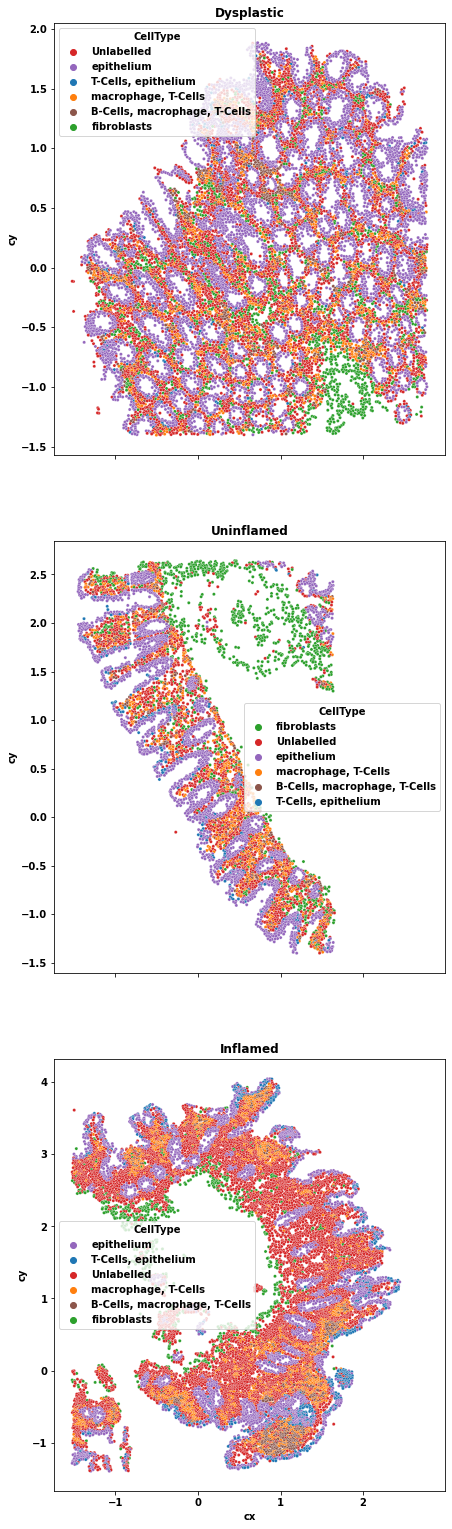

In [8]:
pa = sns.color_palette("tab10", len(difcelltype))
palette_dict = dict(zip(difcelltype, pa))

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(7,9*3), sharex=True)
for i in range(len(dfl)):
    sns.scatterplot(x='cx', y='cy', data=dfl[i], hue="CellType", s = 10, ax=ax[i], palette=palette_dict)
    ax[i].set_title(f"{typelist[i]}")
    fig.show()

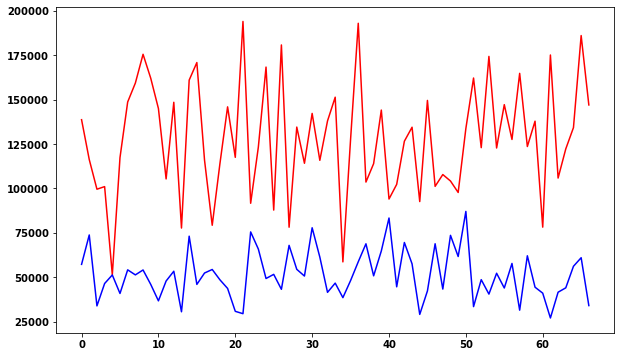

In [24]:
# impact of n epochs on unlabelled cells
unlabelled = []
multilabelled = []
for n in range(50, 10000, 150):
    som = SOM(m=Som_M, n=Som_N, dim=54)
    som.fit(np.array(df2),epochs=n)
    celltypes = CellType(som, df2.copy(), col)
    celltypes.proportion()
    celltypes.fixeClusterLabel()
    celltypes.findLabel()
    dftr = df2.copy()
    dftr = dftr[dftr["Status.simple"] == "Uninflamed"]
    dftr["prediction"] = som.predict(np.array(df2))
    dftr["CellType"] = 'Unlabelled'
    for j in range(len(celltypes.celltype)):
        ct = celltypes.celltype[j]
        for y in range(len(ct)):
            mask = dftr['prediction'] == ct[y]
            overide = dftr['CellType'][mask] != 'Unlabelled'
            if sum(overide) > 0:  
                df_np = dftr[mask]["CellType"].values
                dftr["CellType"][mask] = "multi"
            else:
                dftr["CellType"][mask] = celltypes.labels[j]
    unlabelled.append(len(dftr[dftr["CellType"] == "Unlabelled"]))
    multilabelled.append(len(dftr[dftr["CellType"] == "multi"]))

plt.plot([i*150 for i in range(len(unlabelled))], unlabelled, color='red')
plt.plot([i*150 for i in range(len(multilabelled))], multilabelled, color='blue')


2x1 : 100.0 % unlabelled
2x1 : 0.0 % multilabelled
2x2 : 4.787057154258857 % unlabelled
2x2 : 17.300359153992815 % multilabelled
3x2 : 20.565445838691083 % unlabelled
3x2 : 10.007537799849244 % multilabelled
3x3 : 13.788631224227377 % unlabelled
3x3 : 15.936349931273 % multilabelled
4x3 : 21.548131069037378 % unlabelled
4x3 : 11.055070278898596 % multilabelled
4x4 : 24.72176650556467 % unlabelled
4x4 : 8.300447833991043 % multilabelled
5x4 : 17.995942890081142 % unlabelled
5x4 : 12.332062253358755 % multilabelled
5x5 : 31.17656187646876 % unlabelled
5x5 : 10.188223296235535 % multilabelled
6x5 : 31.146632377067352 % unlabelled
6x5 : 7.196936106061277 % multilabelled
6x6 : 33.47559083048818 % unlabelled
6x6 : 13.037068239258634 % multilabelled
7x6 : 28.86755642264887 % unlabelled
7x6 : 5.639493637210127 % multilabelled
7x7 : 33.683988826320224 % unlabelled
7x7 : 3.3437901831241965 % multilabelled
8x7 : 24.203542765929146 % unlabelled
8x7 : 11.56664301866714 % multilabelled
8x8 : 32.6298

Text(0, 0.5, 'percentage of unlabelled/multilabelled cells')

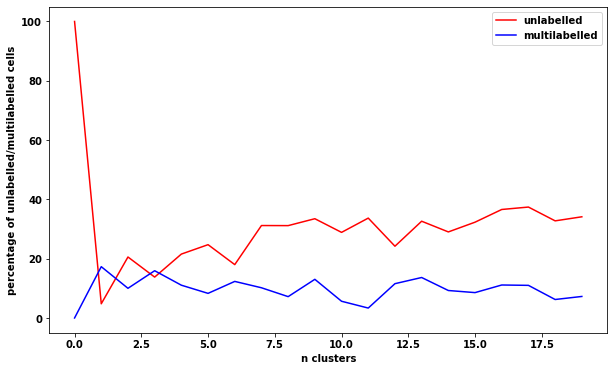

In [15]:
# impact of n epochs on unlabelled cells
unlabelled = []
multilabelled = []
m = n = 1
for i in range(0, 20):
    if i % 2 == 0:
        m += 1
    else:
        n += 1
    som = SOM(m=m, n=n, dim=54)
    som.fit(np.array(df2),epochs=10000)
    celltypes = CellType(som, df2.copy(), col)
    celltypes.proportion()
    celltypes.fixeClusterLabel()
    celltypes.findLabel()
    dftr = df2.copy()
    dftr = dftr[df["Status.simple"] == "Uninflamed"]
    dftr["prediction"] = som.predict(np.array(dftr))
    dftr["CellType"] = 'Unlabelled'
    for j in range(len(celltypes.celltype)):
        ct = celltypes.celltype[j]
        for y in range(len(ct)):
            mask = dftr['prediction'] == ct[y]
            overide = dftr['CellType'][mask] != 'Unlabelled'
            if sum(overide) > 0:  
                df_np = dftr[mask]["CellType"].values
                dftr["CellType"][mask] = "multi"
            else:
                dftr["CellType"][mask] = celltypes.labels[j]
    unlabelled.append(len(dftr[dftr["CellType"] == "Unlabelled"])/len(dftr)*100)
    multilabelled.append(len(dftr[dftr["CellType"] == "multi"])/len(dftr)*100)
    print(f"{m}x{n} : {unlabelled[len(unlabelled)-1]} % unlabelled")
    print(f"{m}x{n} : {multilabelled[len(multilabelled)-1]} % multilabelled")

plt.plot([i for i in range(len(unlabelled))], unlabelled, color='red')
plt.plot([i for i in range(len(multilabelled))], multilabelled, color='blue')
plt.legend(["unlabelled", "multilabelled"]) 
plt.xlabel("n clusters")
plt.ylabel("percentage of unlabelled/multilabelled cells")